In [1]:
## Module import
import numpy as np
import pandas as pd

In [54]:
## Data import
data_loc = '../Data/'

sentiment_data = pd.read_csv(data_loc + 'Dogecoin_final_score.csv')
price_data = pd.read_csv(data_loc + 'dogecoin_price_data.csv')

In [55]:
sentiment_data.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score
0,0.000140,$TCT @wildcardp2e can't wait to play #wildcard...,00:00:00,2022-01-31 00:00:00,0.000140,NaN
1,0.000164,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-31 00:00:00,0.000164,NaN
2,0.000123,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-30 00:00:00,0.000123,NaN
3,0.000363,"The current price of one DOGE is now: $0.1412,...",00:00:03,2022-01-31 00:00:03,0.000363,NaN
4,0.000081,"The current price of one DOGE is now: $0.1421,...",00:00:03,2022-01-30 00:00:03,0.000081,NaN


In [56]:
## Create an hour column
sentiment_data['hour'] = sentiment_data['time'].apply(lambda x: x.split(':')[0])
sentiment_data.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour
0,0.000140,$TCT @wildcardp2e can't wait to play #wildcard...,00:00:00,2022-01-31 00:00:00,0.000140,NaN,00
1,0.000164,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-31 00:00:00,0.000164,NaN,00
2,0.000123,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-30 00:00:00,0.000123,NaN,00
3,0.000363,"The current price of one DOGE is now: $0.1412,...",00:00:03,2022-01-31 00:00:03,0.000363,NaN,00
4,0.000081,"The current price of one DOGE is now: $0.1421,...",00:00:03,2022-01-30 00:00:03,0.000081,NaN,00


<AxesSubplot:xlabel='time'>

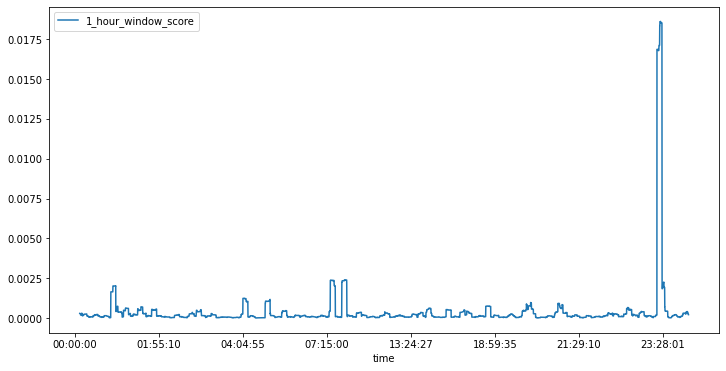

In [57]:
## Plot the sentiment score
sentiment_data.plot(x='time', y='1_hour_window_score', figsize=(12,6))

In [58]:
price_data.head()

,price,date,time
0,0.143478,2022-01-30,00:04:01
1,0.143517,2022-01-30,00:09:40
2,0.143660,2022-01-30,00:13:36
3,0.143382,2022-01-30,00:19:01
4,0.143133,2022-01-30,00:24:22


In [59]:
price_data['hour'] = price_data['time'].apply(lambda x: x.split(':')[0])
price_data.head()

,price,date,time,hour
0,0.143478,2022-01-30,00:04:01,00
1,0.143517,2022-01-30,00:09:40,00
2,0.143660,2022-01-30,00:13:36,00
3,0.143382,2022-01-30,00:19:01,00
4,0.143133,2022-01-30,00:24:22,00


In [60]:
## Convert hour column to int
price_data['hour'] = price_data['hour'].astype(int)
sentiment_data['hour'] = sentiment_data['hour'].astype(int)

<AxesSubplot:xlabel='time'>

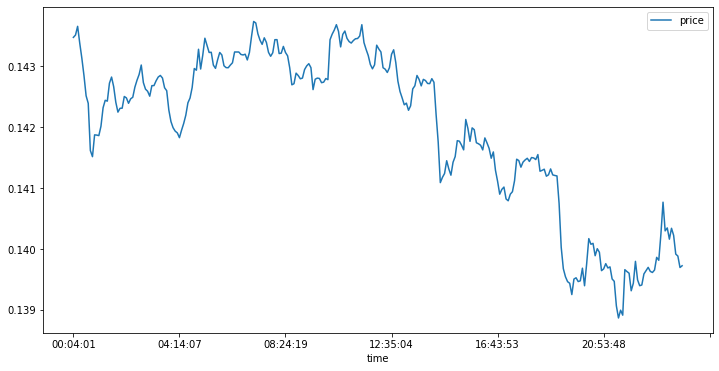

In [61]:
## Plot the price data
price_data.plot(x='time', y='price', figsize=(12,6))

In [62]:
price_data_hourly = price_data[price_data['hour'] != price_data['hour'].shift(-1)]
price_data_hourly.head()

,price,date,time,hour
10,0.141876,2022-01-30,00:54:49,0
23,0.142314,2022-01-30,01:59:37,1
35,0.142592,2022-01-30,02:59:37,2
47,0.141993,2022-01-30,03:59:54,3
58,0.142938,2022-01-30,04:54:22,4


In [63]:
## Create a new dataframe where the time of format H:M:S, where H changes every hour
sentiment_data['hour'] = sentiment_data['time'].apply(lambda x: x.split(':')[0])
sentiment_data['hour'] = sentiment_data['hour'].astype(int)
sentiment_data.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour
0,0.000140,$TCT @wildcardp2e can't wait to play #wildcard...,00:00:00,2022-01-31 00:00:00,0.000140,NaN,0
1,0.000164,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-31 00:00:00,0.000164,NaN,0
2,0.000123,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-30 00:00:00,0.000123,NaN,0
3,0.000363,"The current price of one DOGE is now: $0.1412,...",00:00:03,2022-01-31 00:00:03,0.000363,NaN,0
4,0.000081,"The current price of one DOGE is now: $0.1421,...",00:00:03,2022-01-30 00:00:03,0.000081,NaN,0


In [64]:
## Create a column with average sentiment score for each hour
sentiment_data['hour_average'] = sentiment_data.groupby('hour')['1_hour_window_score'].transform('mean')
sentiment_data.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour,hour_average
0,0.000140,$TCT @wildcardp2e can't wait to play #wildcard...,00:00:00,2022-01-31 00:00:00,0.000140,NaN,0,0.000393
1,0.000164,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-31 00:00:00,0.000164,NaN,0,0.000393
2,0.000123,The current price of one Baby Doge Coin is: $0...,00:00:00,2022-01-30 00:00:00,0.000123,NaN,0,0.000393
3,0.000363,"The current price of one DOGE is now: $0.1412,...",00:00:03,2022-01-31 00:00:03,0.000363,NaN,0,0.000393
4,0.000081,"The current price of one DOGE is now: $0.1421,...",00:00:03,2022-01-30 00:00:03,0.000081,NaN,0,0.000393


In [65]:
## Create a dataframe from snetiment_data with rows where the hour value of next row is plus 1
sentiment_data_hourly = sentiment_data[sentiment_data['hour_average'] != sentiment_data['hour_average'].shift(-1)]
sentiment_data_hourly.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour,hour_average
534,0.000397,The hype can blind people to reality!! Just l...,00:59:57,2022-01-30 00:59:57,0.000397,0.000388,0,0.000393
1024,0.000000,Believe #Crypto regulation will be good for #D...,01:59:59,2022-01-30 01:59:59,0.000000,0.000126,1,0.000328
1508,0.000000,"@MrBeast @localrach Sir, your website seems br...",02:59:47,2022-01-30 02:59:47,0.000000,0.000156,2,0.000161
1952,0.000000,@MattWallace888 dogecoin,03:59:48,2022-01-30 03:59:48,0.000000,0.000033,3,0.000096
2456,0.000000,We will buy a tesla in dogecoin if @elonmusk r...,04:59:57,2022-01-31 04:59:57,0.000000,0.000063,4,0.000333


In [66]:
sentiment_data_hourly.tail()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour,hour_average
5285,0.000000,Dogecoin 1-week social activity: Galaxy Score...,19:59:58,2022-01-29 19:59:58,0.000000,0.000046,19,0.000113
5760,0.000181,"Bitcoin, Ethereum, Shiba Inu, Dogecoin, BNB - ...",20:59:52,2022-01-30 20:59:52,0.000181,0.000910,20,0.000283
6232,0.000000,Baby Doge Coin BUSD $BABYDOGEB is live on Nomi...,21:59:49,2022-01-29 21:59:49,0.000000,0.000096,21,0.000189
6739,0.000291,Y'all gotta realize he's so rich he gains off ...,22:59:56,2022-01-29 22:59:56,0.000291,0.000357,22,0.000234
7303,0.000000,Best Penny Stocks To Buy This Week? $AMC $G...,23:59:58,2022-01-30 23:59:58,0.000000,0.000219,23,0.002157


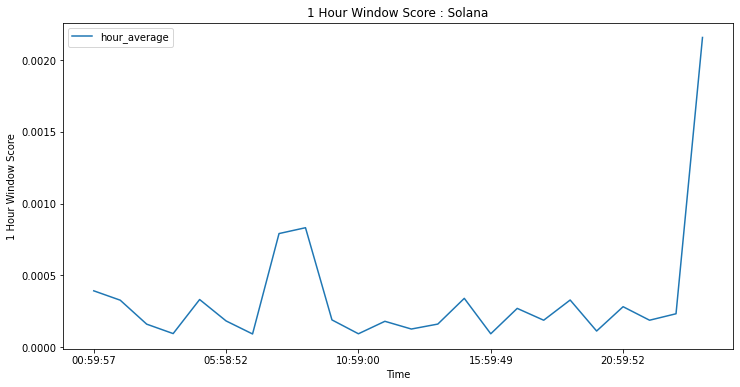

In [67]:
## Plot the sentiment score
plot = sentiment_data_hourly.plot(x='time', y='hour_average', figsize=(12,6))
plot.set_xlabel('Time')
plot.set_ylabel('1 Hour Window Score')
plot.set_title('1 Hour Window Score : Solana')
plot.legend(loc='upper left')

In [68]:
len(sentiment_data_hourly)

24

In [69]:
## Function to merge sentiment_data_hourly and price_data based on time
def merge_data(sentiment_data_hourly, price_data):
    data = sentiment_data_hourly.merge(price_data, on='hour')
    return data

data = merge_data(sentiment_data_hourly, price_data_hourly)
data.head()


,final_score,tweet,time_x,date_x,1_min_window_score,1_hour_window_score,hour,hour_average,price,date_y,time_y
0,0.000397,The hype can blind people to reality!! Just l...,00:59:57,2022-01-30 00:59:57,0.000397,0.000388,0,0.000393,0.141876,2022-01-30,00:54:49
1,0.000000,Believe #Crypto regulation will be good for #D...,01:59:59,2022-01-30 01:59:59,0.000000,0.000126,1,0.000328,0.142314,2022-01-30,01:59:37
2,0.000000,"@MrBeast @localrach Sir, your website seems br...",02:59:47,2022-01-30 02:59:47,0.000000,0.000156,2,0.000161,0.142592,2022-01-30,02:59:37
3,0.000000,@MattWallace888 dogecoin,03:59:48,2022-01-30 03:59:48,0.000000,0.000033,3,0.000096,0.141993,2022-01-30,03:59:54
4,0.000000,We will buy a tesla in dogecoin if @elonmusk r...,04:59:57,2022-01-31 04:59:57,0.000000,0.000063,4,0.000333,0.142938,2022-01-30,04:54:22


In [70]:
data = data[['hour','hour_average', '1_hour_window_score', 'price']]

In [71]:
len(data)

24

In [72]:
data[0:10]

,hour,hour_average,1_hour_window_score,price
0,0,0.000393,0.000388,0.141876
1,1,0.000328,0.000126,0.142314
2,2,0.000161,0.000156,0.142592
3,3,0.000096,0.000033,0.141993
4,4,0.000333,0.000063,0.142938
5,5,0.000184,0.000094,0.143011
6,6,0.000093,0.000175,0.143107
7,7,0.000792,0.000069,0.143440
8,8,0.000833,0.000081,0.142851
9,9,0.000191,0.000087,0.142743


In [73]:
## Function to normalize 1 hour window score to 0 to 1 and price to 0 to 1
def normalize_data(data):
    data['1_hour_window_score'] = (data['1_hour_window_score'] - data['1_hour_window_score'].min()) / (data['1_hour_window_score'].max() - data['1_hour_window_score'].min())
    data['hour_average'] = (data['hour_average'] - data['hour_average'].min()) / (data['hour_average'].max() - data['hour_average'].min())
    #data['price_change_delta'] = (data['price'] - data['price'].shift(1)) / data['price'].shift(1)
    return data

data = normalize_data(data)
data.head()

,hour,hour_average,1_hour_window_score,price
0,0,0.145558,0.405432,0.141876
1,1,0.113941,0.106328,0.142314
2,2,0.033108,0.140906,0.142592
3,3,0.001300,0.000000,0.141993
4,4,0.116167,0.034451,0.142938


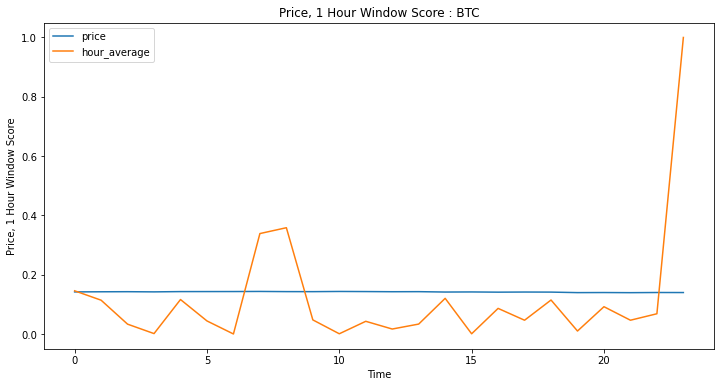

In [74]:
## Plot price, 1_hour_window_score with time
plot = data.plot(x='hour', y=['price','hour_average'], figsize=(12,6))
plot.set_xlabel('Time')
plot.set_ylabel('Price, 1 Hour Window Score')
plot.set_title('Price, 1 Hour Window Score : BTC')
plot.legend(loc='upper left')


In [75]:
## Normalise the price data
data['price_norm'] = (price_data['price'] - price_data['price'].min()) / (price_data['price'].max() - price_data['price'].min())
data.head()

,hour,hour_average,1_hour_window_score,price,price_norm
0,0,0.145558,0.405432,0.141876,0.946321
1,1,0.113941,0.106328,0.142314,0.954293
2,2,0.033108,0.140906,0.142592,0.983599
3,3,0.001300,0.000000,0.141993,0.926710
4,4,0.116167,0.034451,0.142938,0.875529


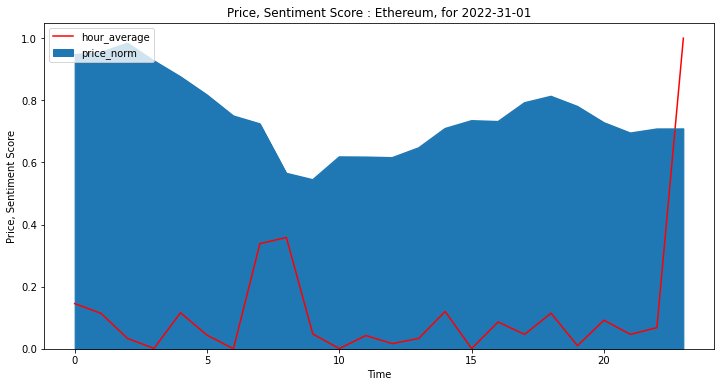

In [76]:
## Plot price, 1_hour_window_score with time where price is bar and 1_hour_window_score is line in the same plot
ax = data[['hour', 'hour_average']].plot(x='hour',color='red', figsize=(12,6))
data[['hour', 'price_norm']].plot(x='hour', kind='area', figsize=(12,6), ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('Price, Sentiment Score')
ax.set_title('Price, Sentiment Score : Ethereum, for 2022-31-01')    
ax.legend(loc='upper left')


In [77]:
## Save the plot with all the axes labels
fig = ax.get_figure()
fig.savefig('../Plots/price_sentiment_score_doge.jpeg')